In [98]:
# Import the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer , SilhouetteVisualizer
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

import joblib

In [37]:
# Lets load the dataset
data = pd.read_csv(r"C:\Users\Harshal\Documents\USL 1\USL Case study\USL Case study\Country-data.csv")

In [38]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Lets explore the dataset

In [39]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


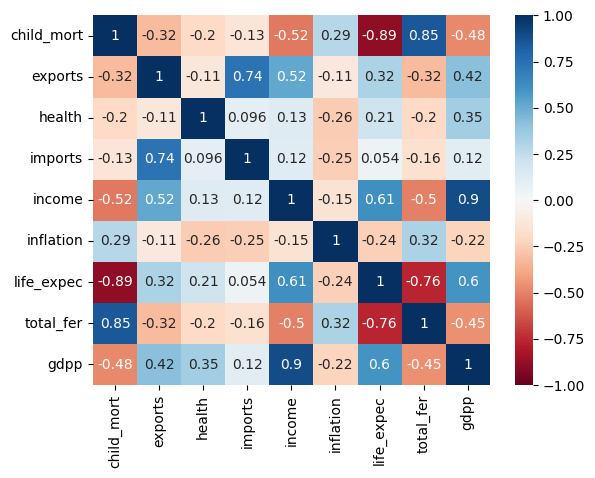

In [40]:
# Correlation Heatmap
sns.heatmap(data.corr(numeric_only=True), annot=True,vmin=-1, cmap='RdBu')
plt.show()

## Lets Visualize The data

In [41]:
# Before we begin visualization lets  convert country (As it is redundant column)
data.set_index('country', inplace=True)
data.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


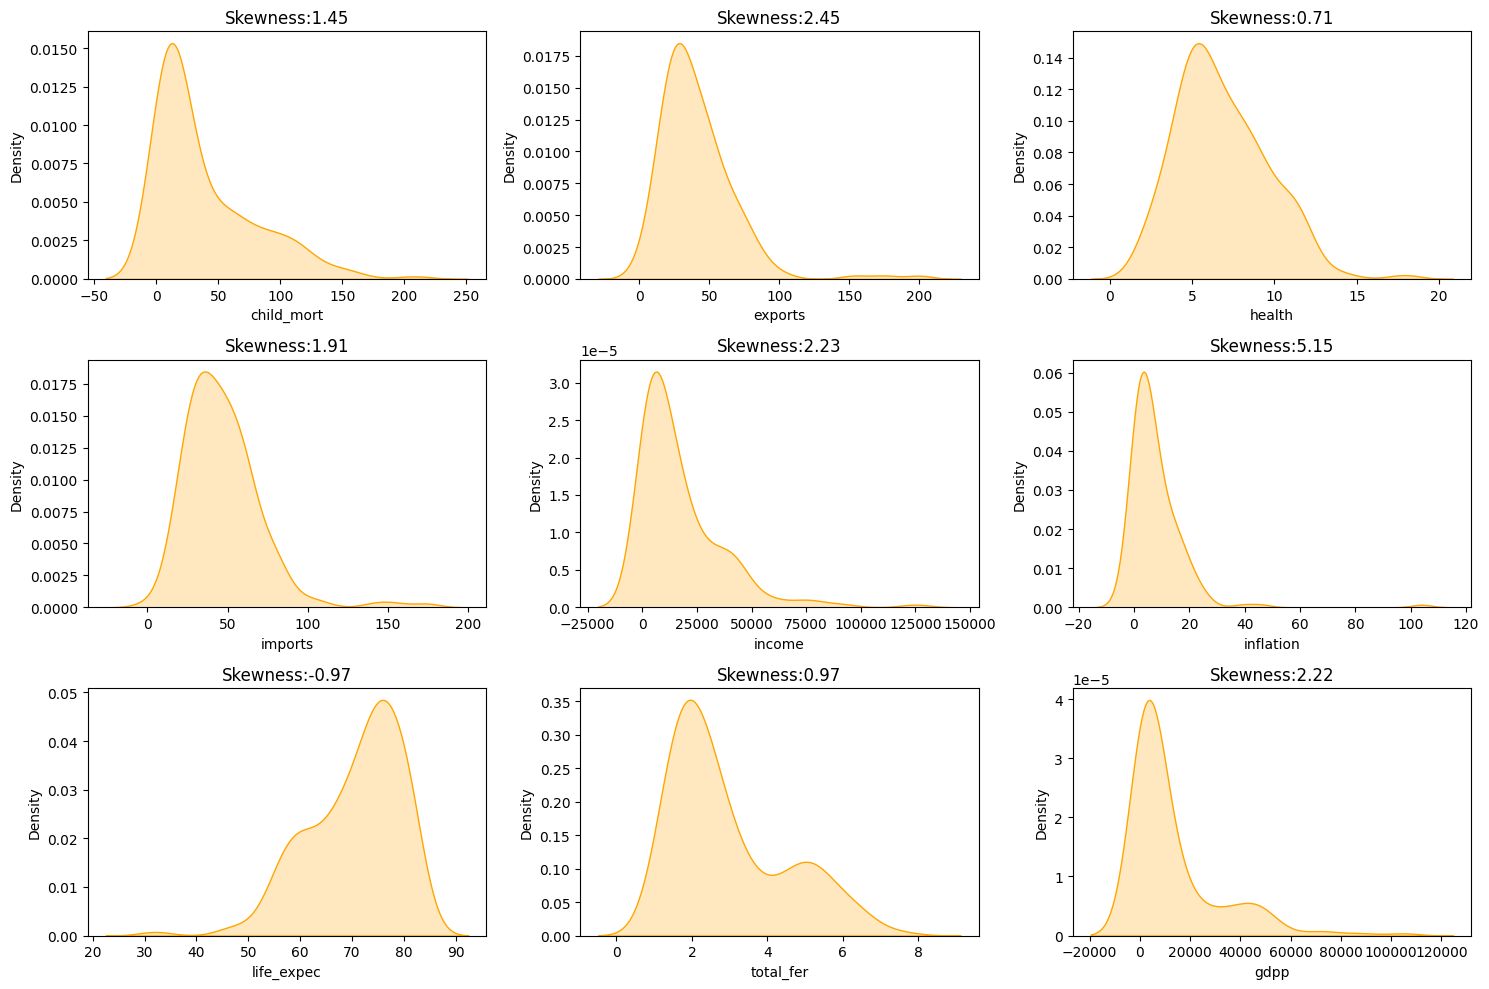

In [42]:
# Univariate Analysis
t =1 
plt.figure(figsize=(15,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.kdeplot(data=data ,x=i,fill=True,color='orange')
    plt.title(f'Skewness:{round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

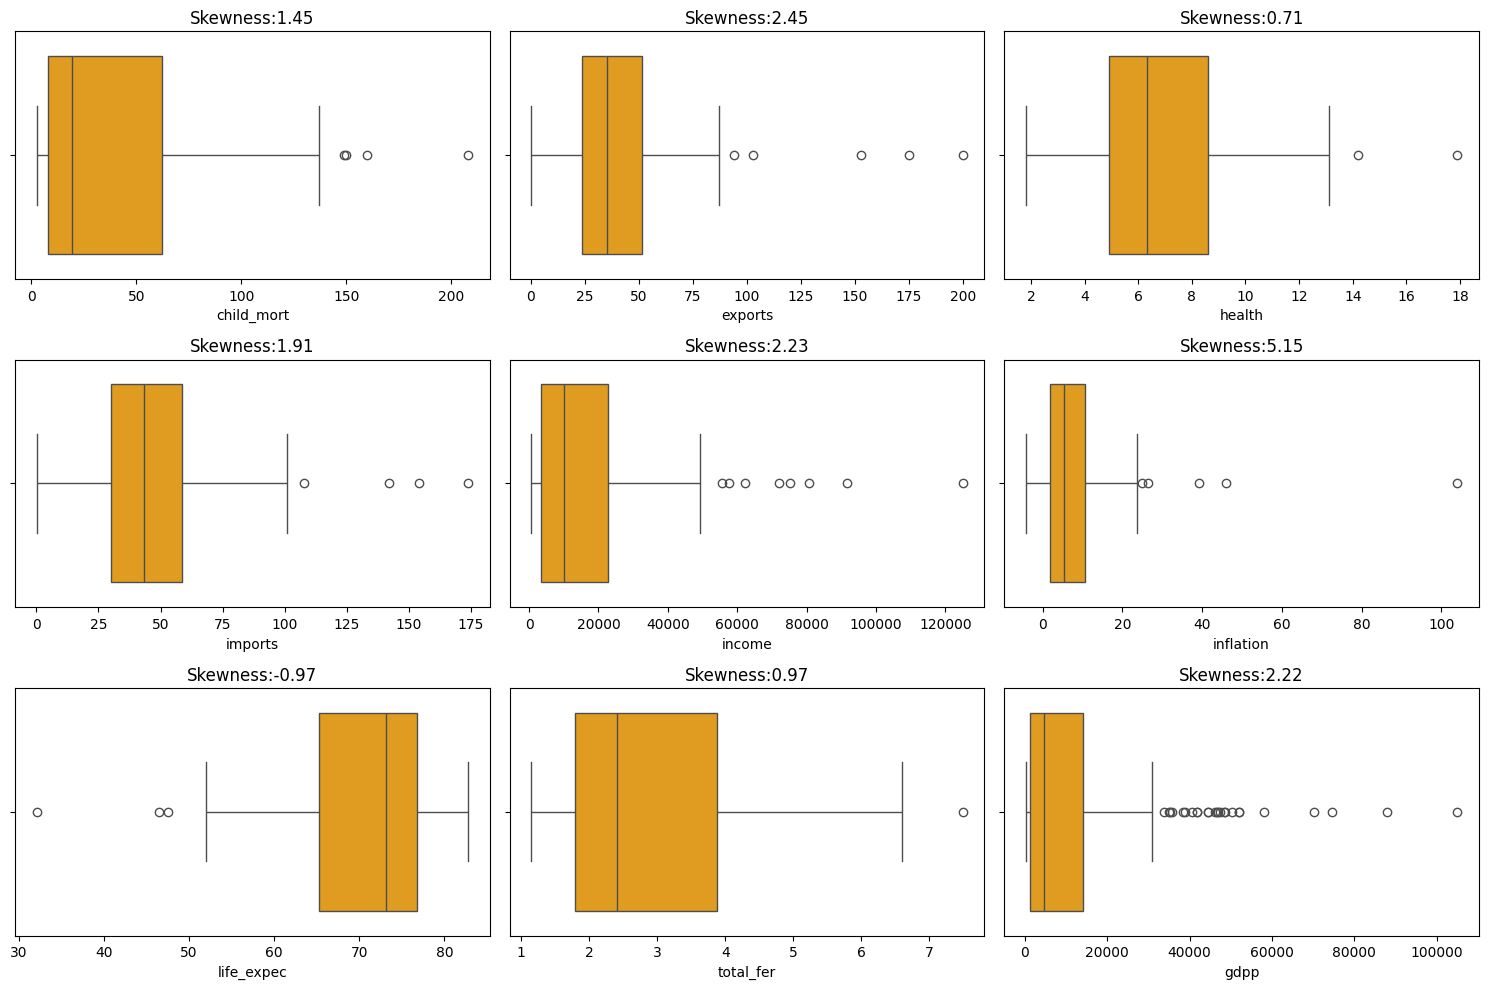

In [43]:
# Boxplot Visualization
t =1 
plt.figure(figsize=(15,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data ,x=i,fill=True,color='orange')
    plt.title(f'Skewness:{round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

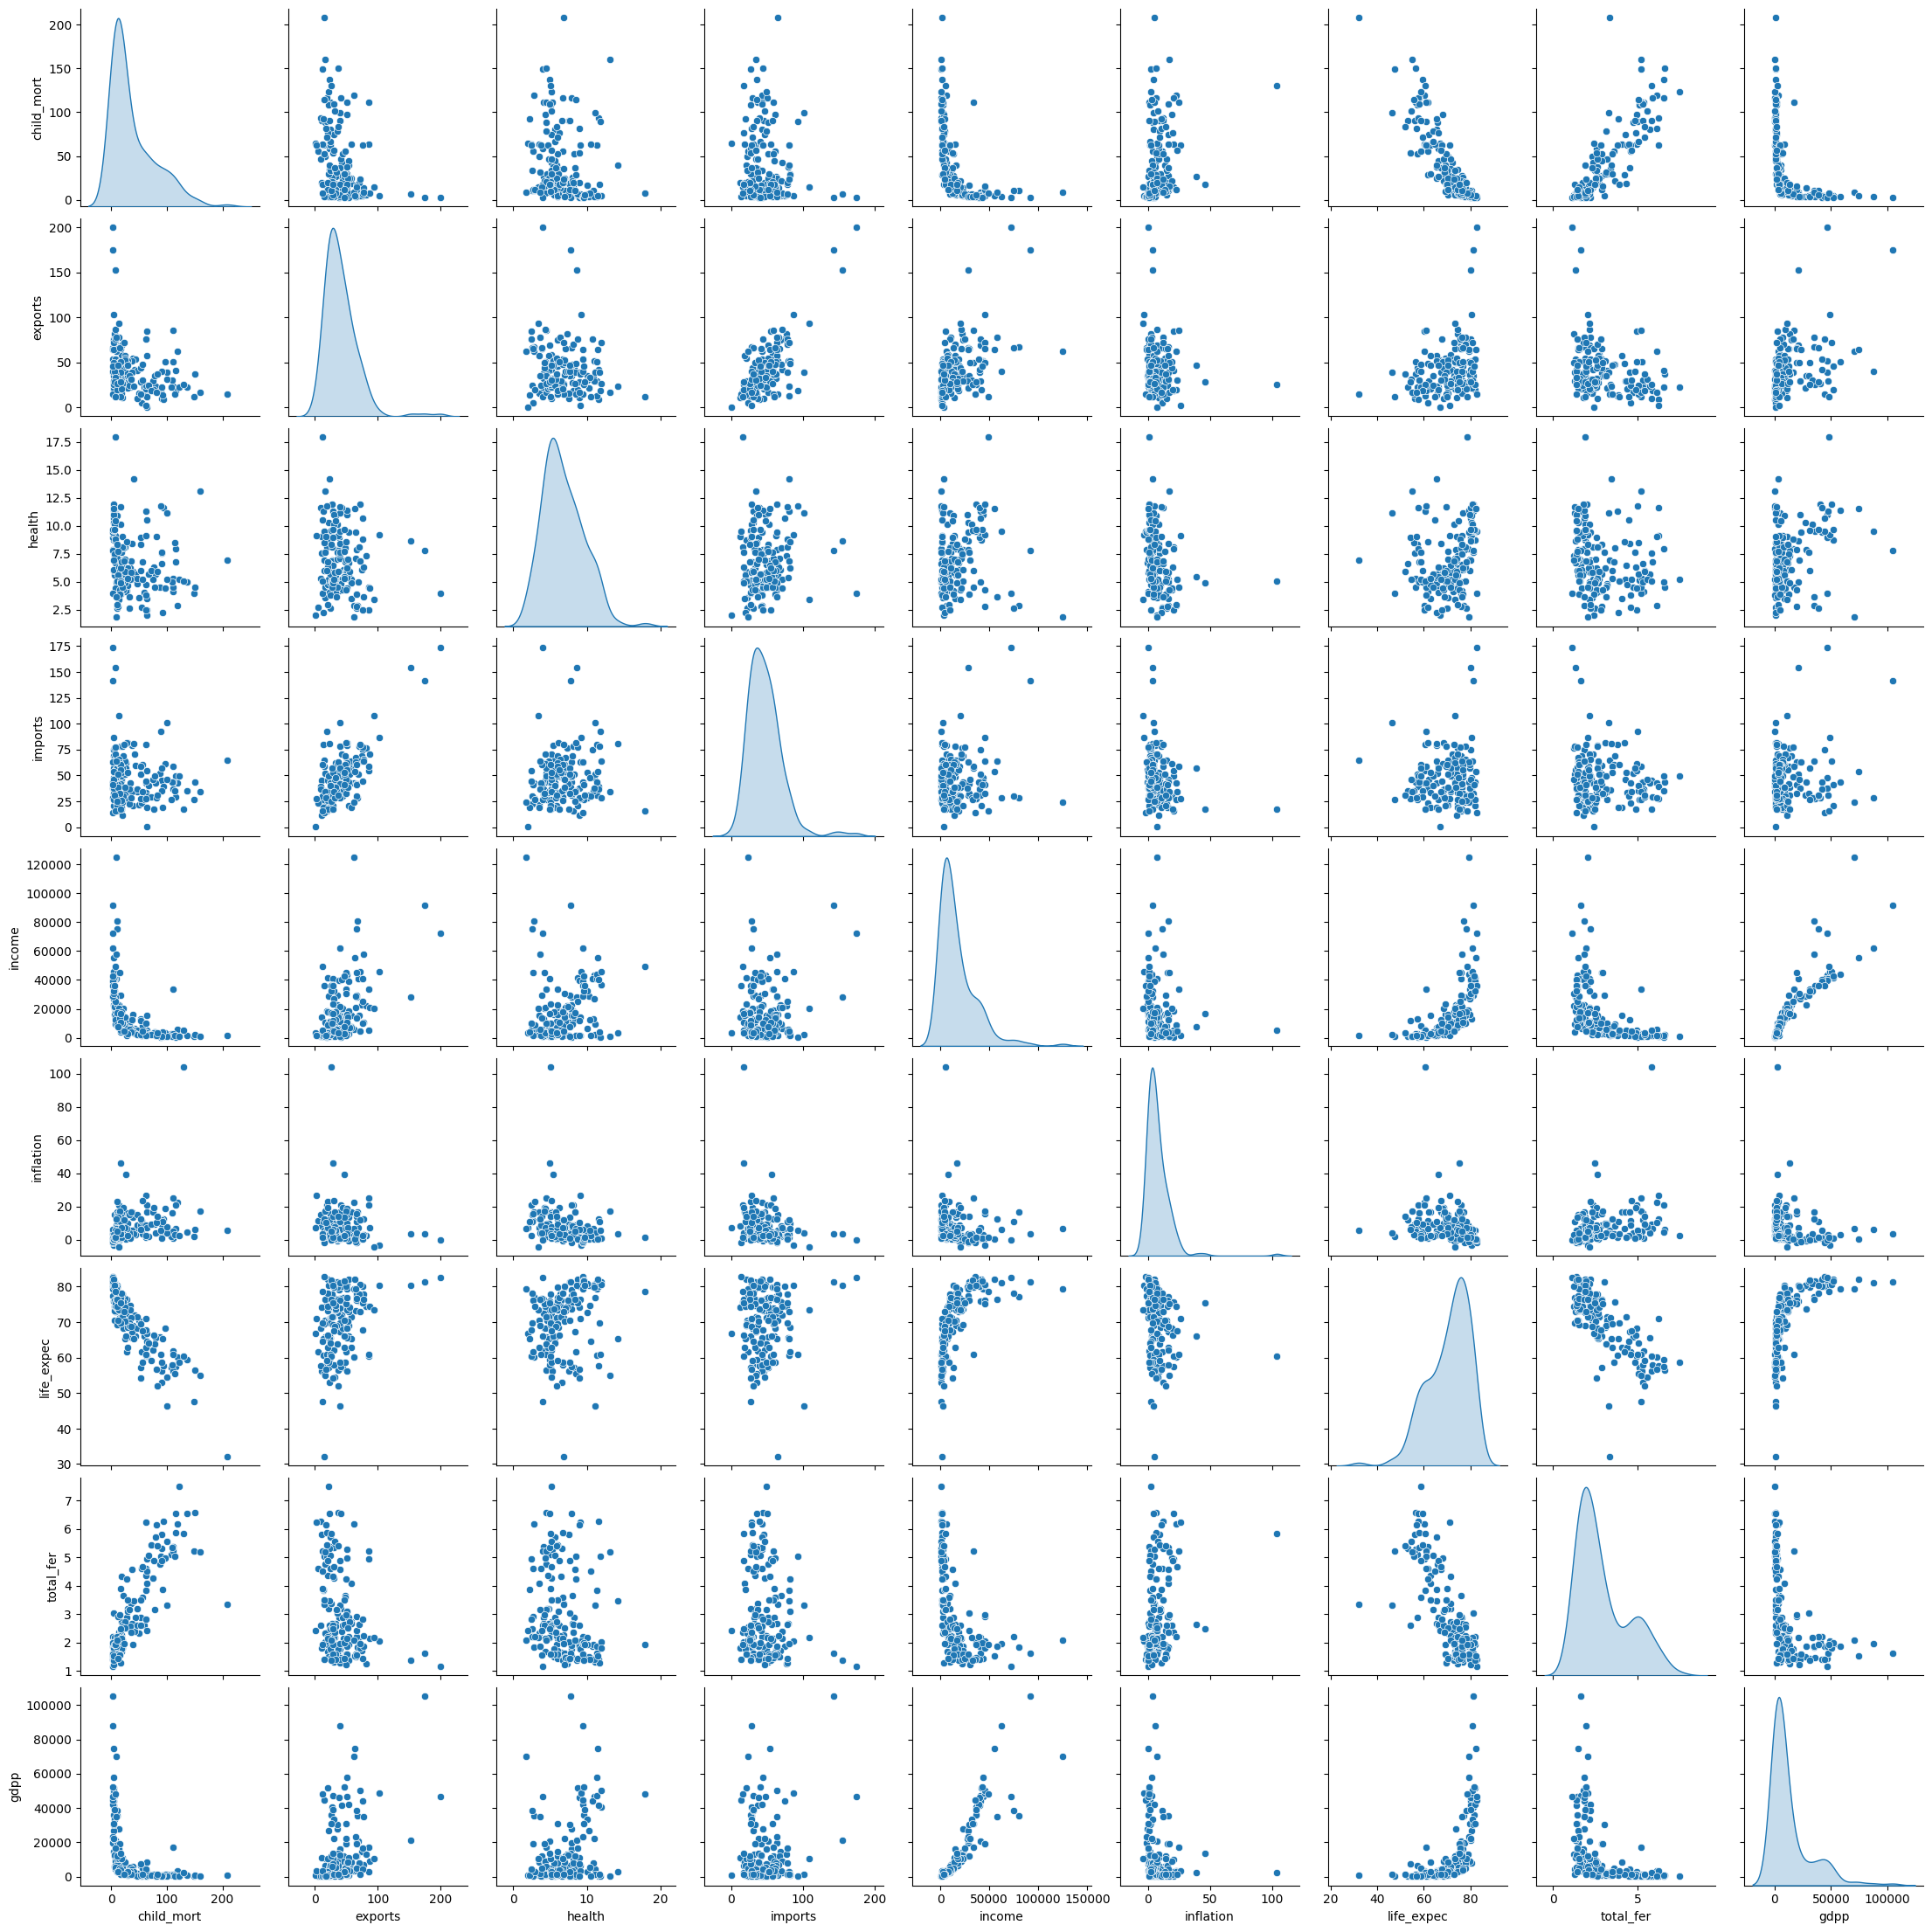

In [44]:
# Multivariate Analysis
sns.pairplot(data,diag_kind='kde')
plt.show()

## Preprocessing

In [45]:
# Checking for missing values
data.isnull().sum()
# No missing values found

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [46]:
# Lets treat the  extreme outliers
# we will go with Capping method (using IQR)
# In order to Cap on the extreme once lets keep whisker length to 2.5

for i in data.columns:
    q1,q3 = np.quantile(data[i],[.25,.75])
    iqr = q3-q1
    ul,ll = q3 +2.5*iqr, q1 - 2.5*iqr
    data[i] = data[i].apply(lambda x : ul if x>ul else ll if x<ll else x)

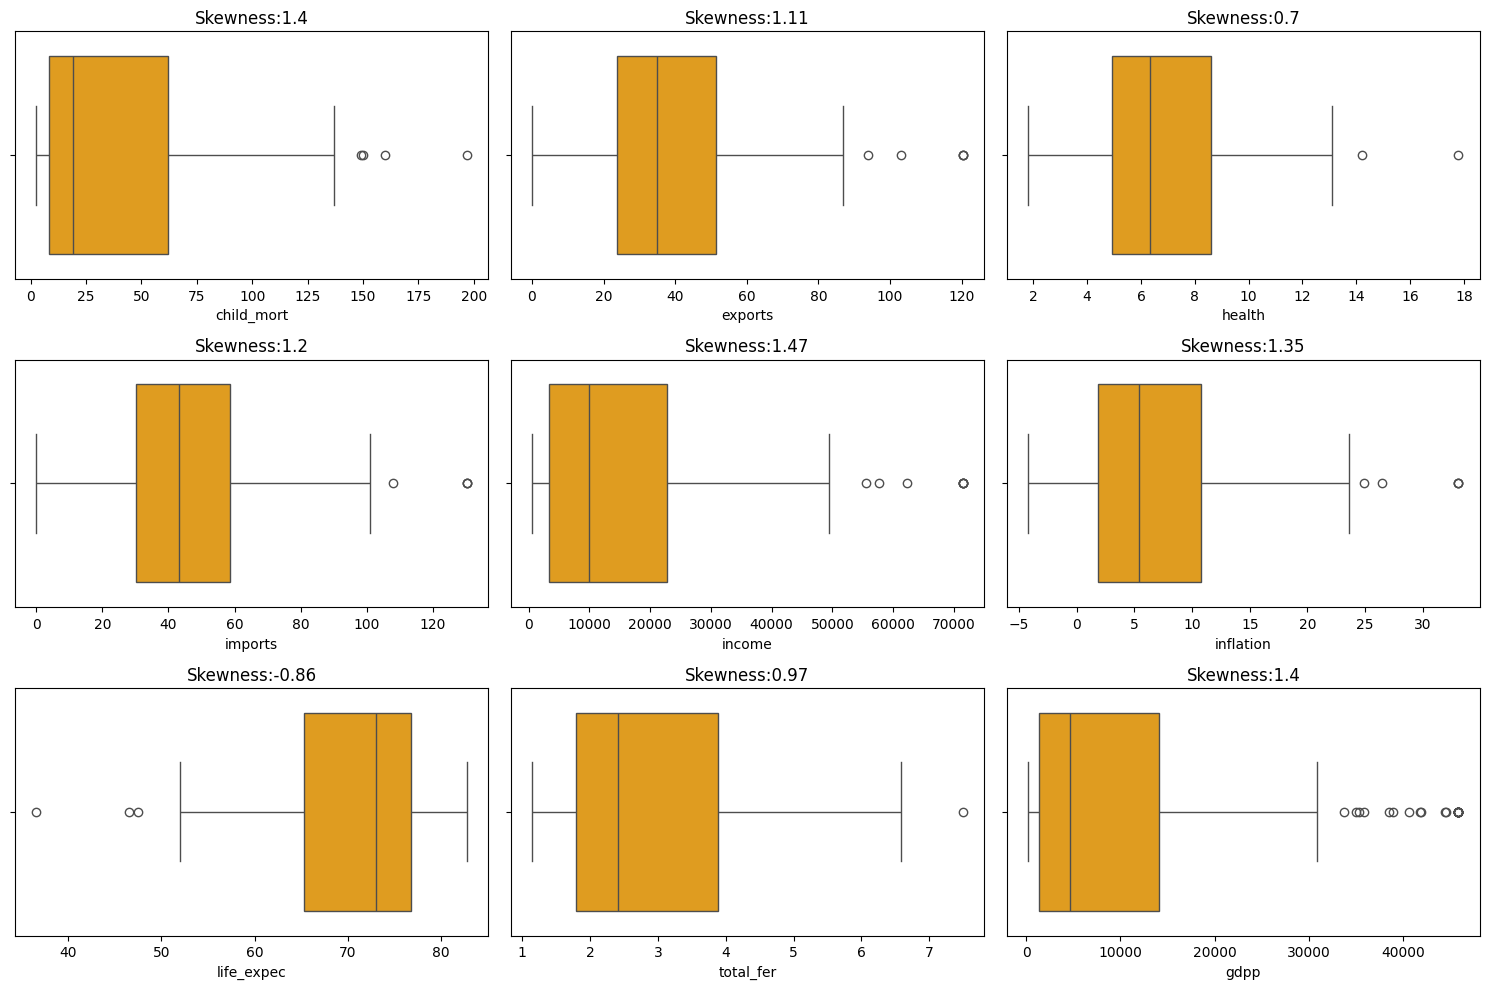

In [47]:
t =1 
plt.figure(figsize=(15,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data ,x=i,fill=True,color='orange')
    plt.title(f'Skewness:{round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

In [48]:
# Lets apply PCA on the data before we proceed to clustering . JUST HAVE BETTER VISUALIZATION AND BETTER CLUSTERING
# In PCA we need to pass the standardized data . so lets import the functions from Library
# Let create an instaance of Scalling
scaler = StandardScaler()

# Lets also create a Instance of PCA
pca = PCA(n_components=5,random_state=2)

# Lets Create Pipeline for the above two process
pipeline = Pipeline([('Scale',scaler),
                     ('PCA',pca)])


In [49]:
pipeline.fit(data)

Pipeline(steps=[('Scale', StandardScaler()),
                ('PCA', PCA(n_components=5, random_state=2))])

In [50]:
pca.explained_variance_ratio_.cumsum()

# At n_components = 5 we are able to explain  ~ 95% variancee , which is good enough
# So 9 Dimension data can be reduced to 5 Dimension

array([0.4758564 , 0.64300208, 0.77845398, 0.88018006, 0.94647697])

In [51]:
final_data = pipeline.transform(data)

In [52]:
final_data = pd.DataFrame(final_data,columns=['PC1','PC2','PC3','PC4','PC5'],index=data.index)
final_data.head()

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-3.043637,-0.201155,0.951322,0.793445,-0.006800
Albania,0.423415,-0.371463,0.171749,-1.353581,0.088623
Algeria,-0.404684,-0.440312,-1.636775,-0.573008,0.397119
Angola,-3.150063,1.425283,-1.784982,1.580071,0.142609
Antigua and Barbuda,1.145313,0.392985,0.151332,-0.823193,-0.370311


# K-Mean Clustering

In [55]:
# Identify the value of K

# K-ELbow Visualizer
kelbow = KElbowVisualizer(estimator=KMeans(random_state=2),k=10)

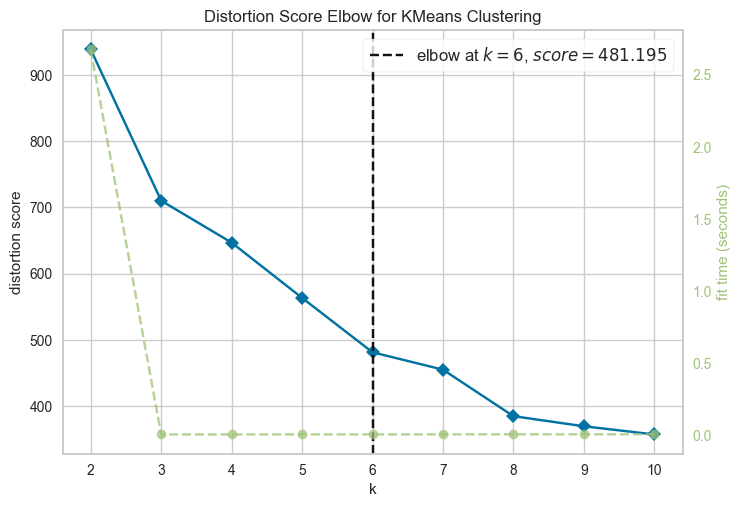

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
kelbow.fit(final_data)
kelbow.show()

Although the above plot marks the elbow at k =6 . But we can see the significant drop in distortion score from k=2 to k=3 . AS
we increase number of clusters might become overfitted . Lets explore Sillhouete Visualizer to identify the correct or more generalised
value at k .

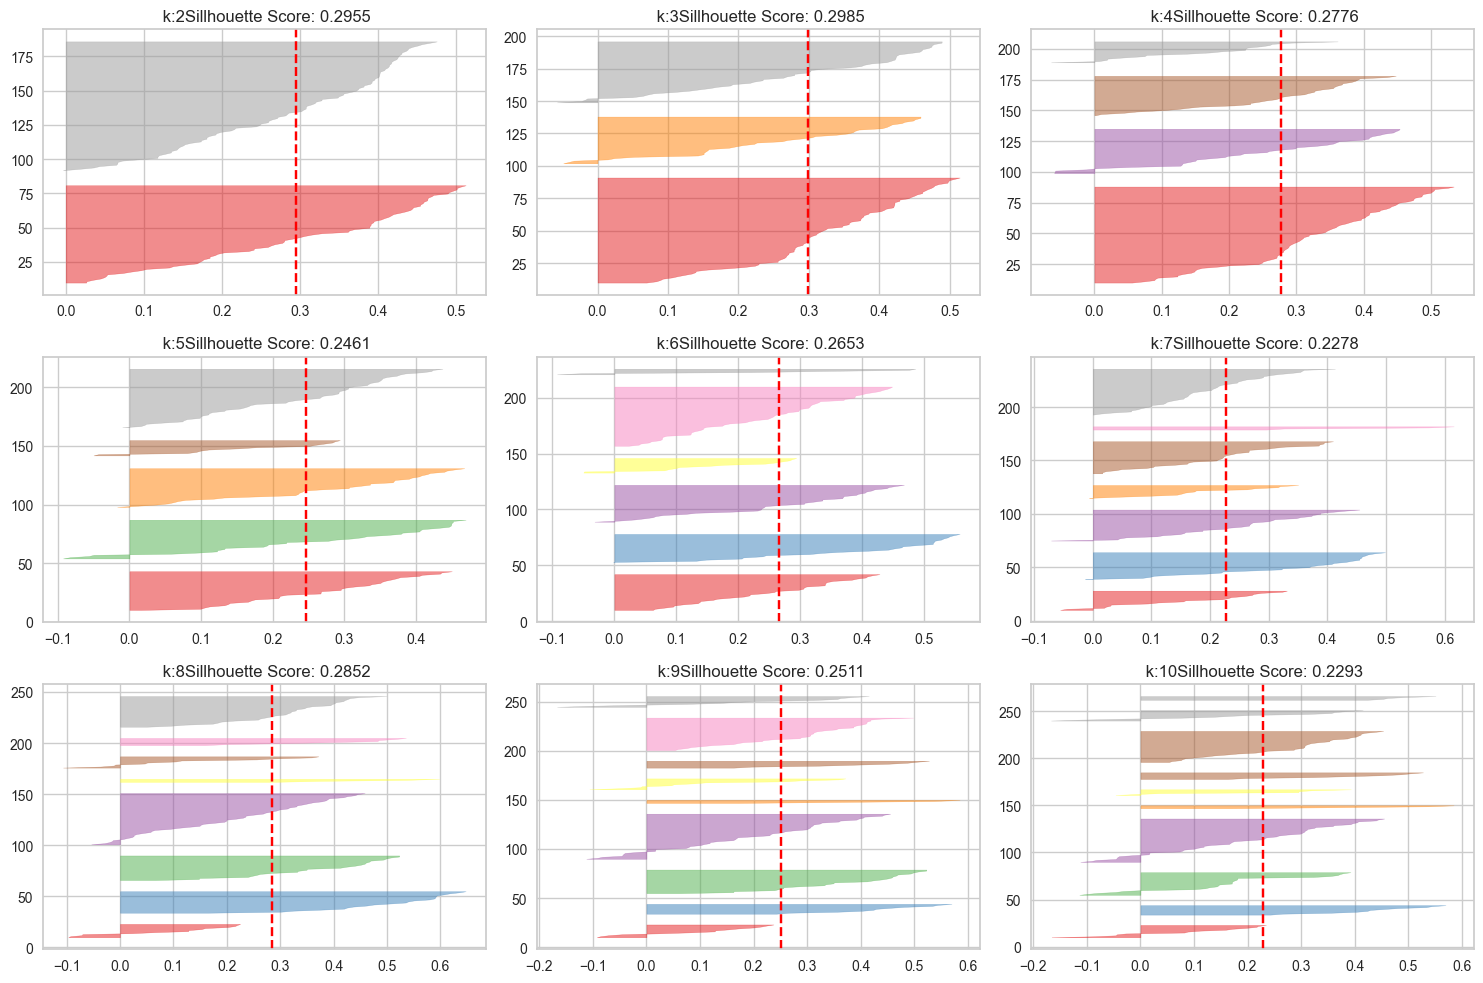

In [59]:
t = 1
plt.figure(figsize=(15,10)) 
for i in range(2,11):
    plt.subplot(3,3,t)
    model = KMeans(n_clusters=i,random_state=2)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(final_data)
    plt.title(f' k:{i}Sillhouette Score: {round(sil_viz.silhouette_score_,4)}')
    t+=1
plt.tight_layout()
plt.show()

After Analysing Elbow plot and Sillhouete visualizer lets go with K = 3 . Although there are few datapoints that have been misclassified , but we see no drop in sillhouete score and there is good enough data in every cluster . Also from K-Elboe plot significant drop was seen in WCSS(Distortion Score) was observed from K=2 to K=3

In [60]:
final_Kmeans = KMeans(n_clusters=3,random_state=2)

In [61]:
labels = final_Kmeans.fit_predict(final_data)

In [62]:
# Lets check the sillhouete Score 
print('Sillhouete Score:',silhouette_score(final_data,labels))

Sillhouete Score: 0.29845782348296623


In [63]:
# Lets put this labels on PCA DATA

final_data['Labels'] = labels
final_data.head()

,PC1,PC2,PC3,PC4,PC5,Labels
country,,,,,,
Afghanistan,-3.043637,-0.201155,0.951322,0.793445,-0.006800,2
Albania,0.423415,-0.371463,0.171749,-1.353581,0.088623,0
Algeria,-0.404684,-0.440312,-1.636775,-0.573008,0.397119,0
Angola,-3.150063,1.425283,-1.784982,1.580071,0.142609,2
Antigua and Barbuda,1.145313,0.392985,0.151332,-0.823193,-0.370311,0


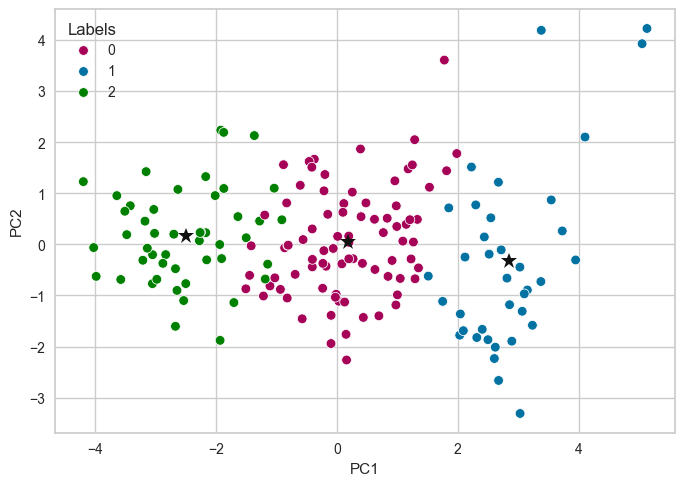

In [68]:
# Lets visualize tha cluster 
# In order to get the best Visualization lets choose PC1 AND PC2  as they have maximum Variance

centroids = final_Kmeans.cluster_centers_
centroids

sns.scatterplot(data=final_data,x='PC1',y='PC2',hue='Labels',palette=['m','b','green'])
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],marker = '*',ms=12,color='k')
plt.show()

## Business Interpretation

In [69]:
# To have Business Understanding lets put the labels on the original Dataset
data['Label'] = labels
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0


In [70]:
data.groupby(by='Label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Label,,,,,,,,,
0,21.508537,40.797317,6.231951,48.097561,12281.097561,7.474744,72.875610,2.311707,6291.146341
1,5.237838,53.575000,8.780270,49.129054,42690.878378,2.588432,79.956757,1.755676,36905.405405
2,92.131771,28.546229,6.296458,41.443040,3937.770833,10.438854,59.438542,4.953958,1902.916667


After studing the above data we can  conclude that contries that hev been asssigned in cluster 2 can be called underdeveloping , 
while cluster 1 can be called as developed countries . Countries belonging to cluster 0 are doing average in most of the factors but struggling in some economic factors like GDPP/INCOME AND Export and Expenditure on Health . Hence they are called Developing Countries.

In [72]:
data['Label']= data['Label'].map({0:'Developing',
                                  1: 'Developed',
                                  2:'UnderDeveloped'})

In [73]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,UnderDeveloped
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Developing
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Developing
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,UnderDeveloped
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Developing


In [74]:
# Developed Countries
data[data['Label']=='Developed'].index

Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object', name='country')

In [75]:
# Developing Countries
data[data['Label']=='Developing'].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles',
       'Solomon Islands', 'Sri Lanka', 'St. Vincent and the Grenadines',
       'Suriname', 'Tajikistan', '

In [76]:
# UnderDeveloped Countries
data[data['Label']=='UnderDeveloped'].index

Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar',
       'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype='object', name='country')

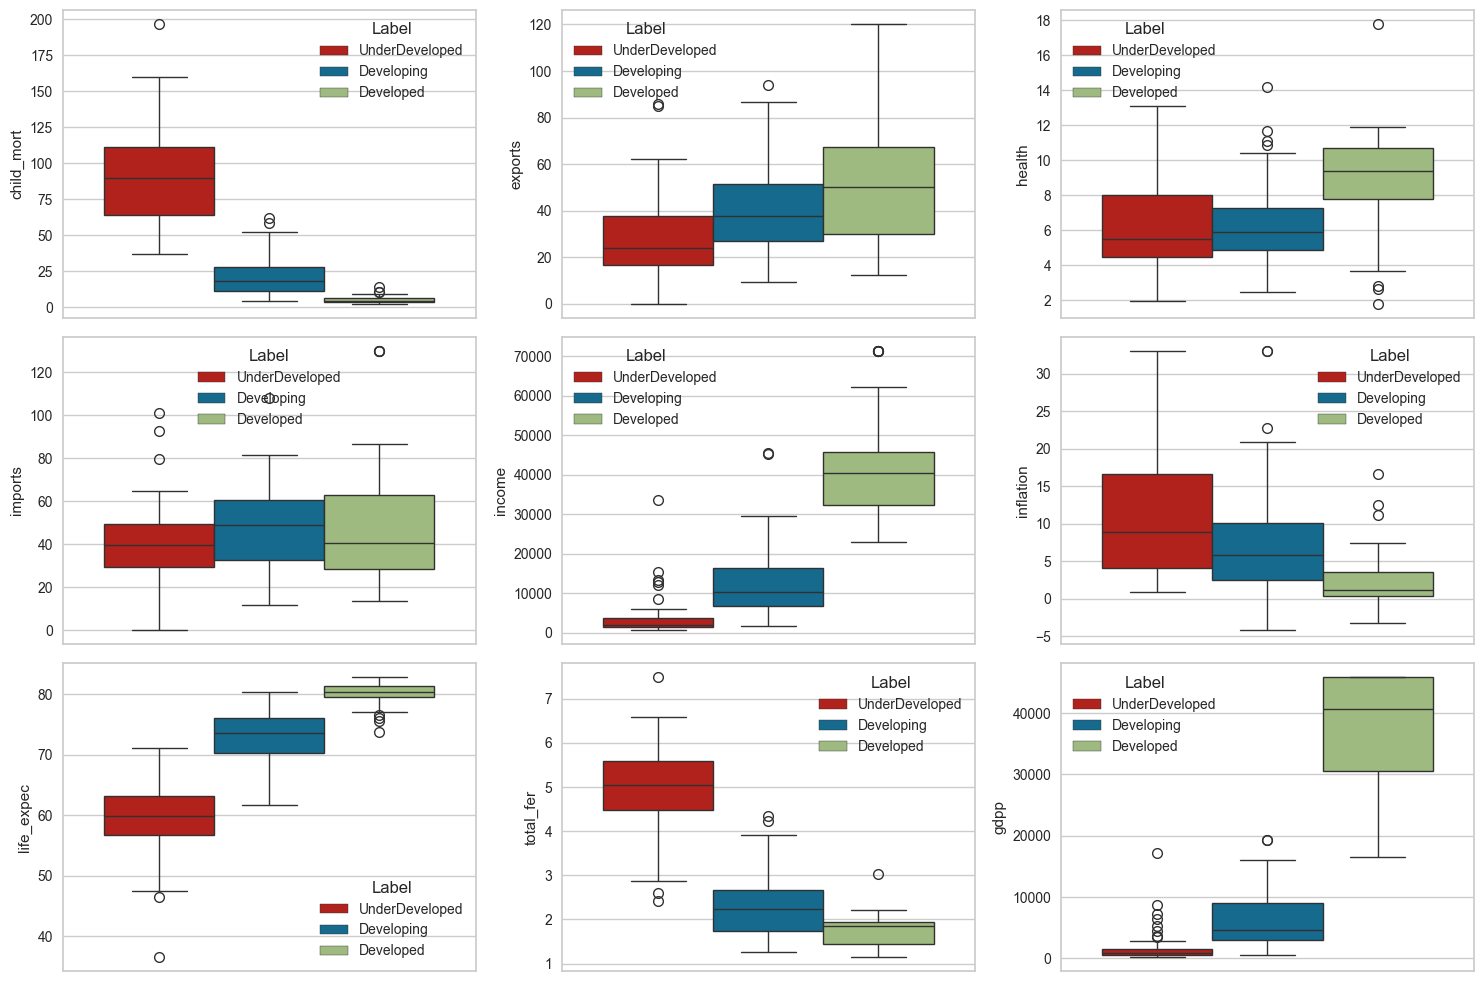

In [80]:
t =1 
plt.figure(figsize=(15,10))
for i in data.columns:
    if i != 'Label':
         plt.subplot(3,3,t)
         sns.boxplot(data=data ,y=i,hue='Label',palette=['r','b','g'])
         t+=1
plt.tight_layout()
plt.show()

In [82]:
# Lets make a World Map
px.choropleth(data_frame=data,locationmode='country names',locations=data.index,color='Label',color_discrete_map={'UnderDeveloped':'red',
                                                                                                                  'Developing':'Blue',
                                                                                                                  'Developed':'green'})

# Deployment

In [93]:
input_data = data.iloc[0,:-1].values
input_data

array([np.float64(90.2), np.float64(10.0), np.float64(7.58),
       np.float64(44.9), np.float64(1610.0), np.float64(9.44),
       np.float64(56.2), np.float64(5.82), np.float64(553.0)],
      dtype=object)

In [95]:
final_input_data = pipeline.transform([input_data])
final_input_data

array([[-3.04363665, -0.20115529,  0.95132235,  0.79344472, -0.00680001]])

In [97]:
final_Kmeans.predict(final_input_data)[0]

np.int32(2)

In [99]:
# Lets create a joblib file of pipeline
with open ('pipeline.joblib','wb') as file :
    joblib.dump(pipeline,file)

In [100]:
# Lets create a joblib file of model
with open ('model.joblib','wb') as file :
    joblib.dump(final_Kmeans,file)